# Calculate signatures for cDC2A and cDC2B from the datasets used in Brown et al. 2019 (Human spleen) and Minutti et al 2024. (Human BM) to see if they align with the CD207+ DC in our cancer myeloid APC atlas

``` bash
rsync -azvhp /QRISdata/Q5935/for_nikita/dc_scRNA/notebook/ /scratch/user/s4436039/scdata/Brown_Minutti_Data/
```

In [2]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context
import seaborn as sns

In [3]:
#set current directory 
os.chdir('/scratch/user/s4436039/scdata/Brown_Minutti_Data/')
os.getcwd()

'/scratch/user/s4436039/scdata/Brown_Minutti_Data'

In [4]:
data_Brown = sc.read_h5ad('brown_GSE137710.h5ad') #mouse BM, lung, spleen data with genes converted to human format
data_Minutti = sc.read_h5ad('minutti_GSE217328_humanized.h5ad') 

In [5]:
data_Brown

AnnData object with n_obs × n_vars = 5110 × 16328
    obs: 'tissue', 'background', 'total_counts', 'mitochondrial_fraction', 'cell_type', 'cluster', 'tsne_x', 'tsne_y'
    uns: 'cell_type_colors', 'log1p'
    obsm: 'X_tsne'
    layers: 'counts'

In [6]:
data_Minutti

AnnData object with n_obs × n_vars = 10253 × 19513
    obs: 'tissue', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'Early pre-cDCs', 'Late pre-cDCs', 'Proliferation', 'pre-cDC1s', 'pre-cDC2s', 'cDC2a', 'cDC2b', 'leiden'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'original_gene_symbol'
    uns: 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'tissue_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'

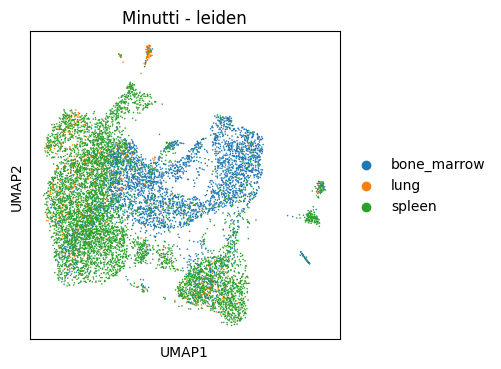

In [7]:
#plotting clusters 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_Minutti, color=["tissue"], ncols = 1, size=5, title="Minutti - leiden")

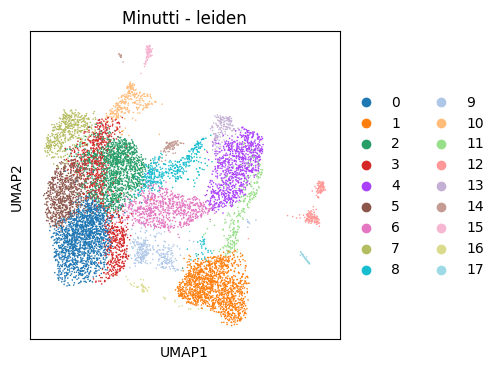

In [10]:
#plotting clusters 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_Minutti, color=["leiden"], ncols = 1, size=5, title="Minutti - leiden")
# KT overlaid signatures from Minutti et al (see minutti_GSE217328.jpynb) and determined cluster 10 is cDC2A and cluster 2 is cDc2B

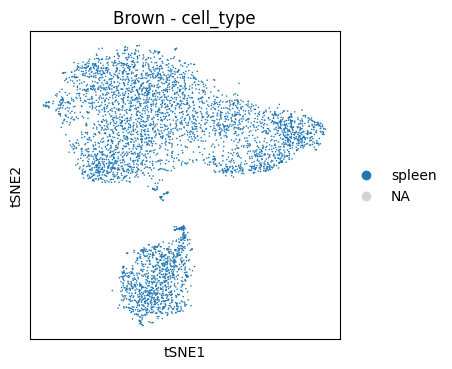

In [21]:
#plotting clusters 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.tsne(data_Brown, color=["tissue"], ncols = 1, size=5, title="Brown - cell_type")

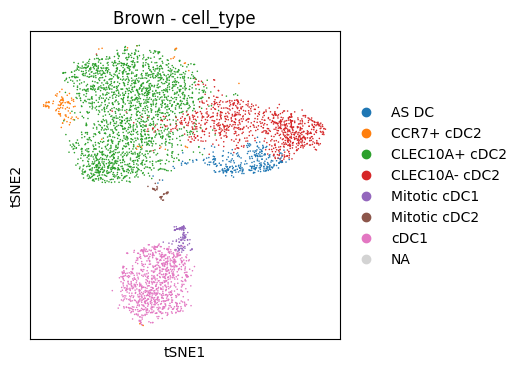

In [11]:
#plotting clusters 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.tsne(data_Brown, color=["cell_type"], ncols = 1, size=5, title="Brown - cell_type")

# Calculate DEG genes from Brown et al

In [12]:
#calculate DEG genes:
sc.tl.rank_genes_groups(data_Brown, groupby="cell_type", key_added="NR_degs", method="wilcoxon") 

/home/s4436039/miniforge3/envs/env/lib/python3.12/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 16328 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


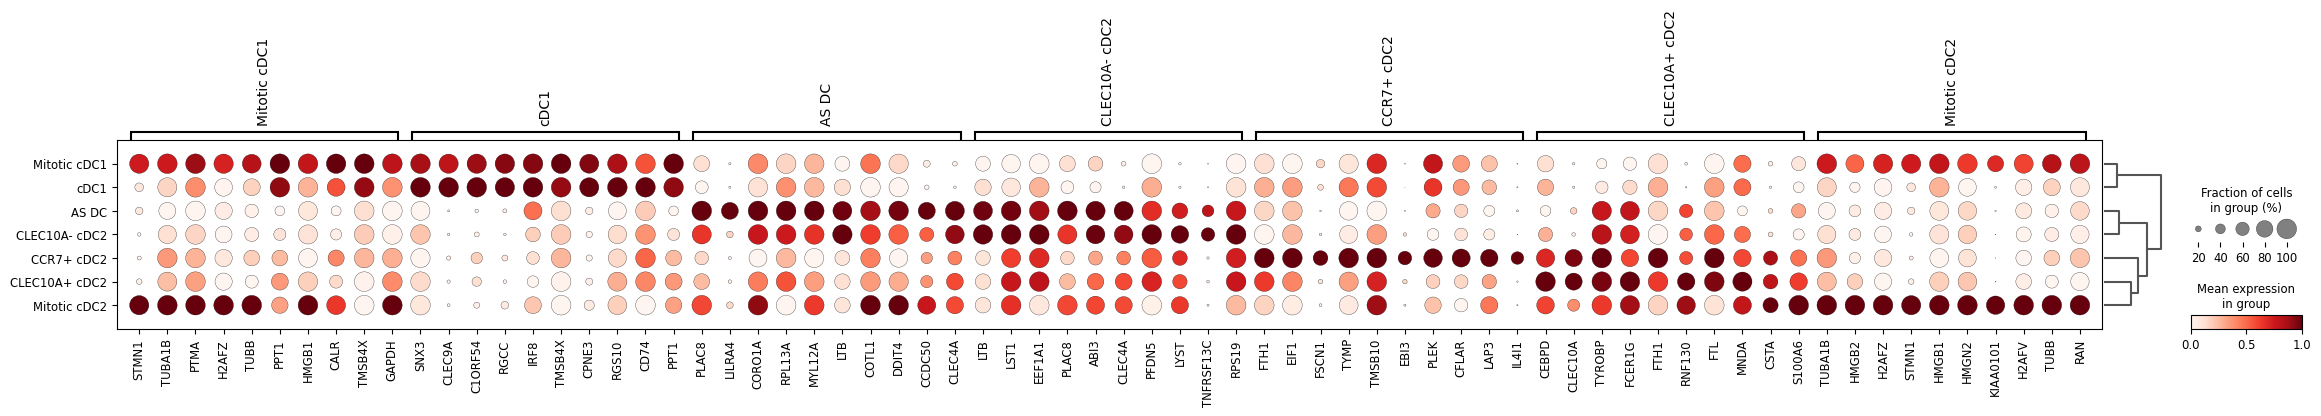

In [13]:
sc.pl.rank_genes_groups_dotplot(data_Brown, groupby="cell_type", key="NR_degs", standard_scale="var", n_genes=10)

In [14]:
# save DEGs for cDC2A (CLEC10A-) and cDC2B (CLEC10A+)

#cDC2A
Brown_DC2A_Degs = sc.get.rank_genes_groups_df(data_Brown, group="CLEC10A- cDC2", key="NR_degs")
#DC2B 
Brown_DC2B_Degs = sc.get.rank_genes_groups_df(data_Brown, group="CLEC10A+ cDC2", key="NR_degs")

In [15]:
Brown_DC2A_Degs.head()

,names,scores,logfoldchanges,pvals,pvals_adj
0,LTB,35.557755,3.261108,6.305311e-277,5.147656e-273
1,LST1,32.424171,1.244492,1.252921e-230,6.819230e-227
2,EEF1A1,26.445158,0.353206,4.147887e-154,7.525188e-151
3,PLAC8,25.809767,1.588037,6.889154e-147,1.022601e-143
4,ABI3,25.791990,1.359329,1.090547e-146,1.483871e-143


In [16]:
Brown_DC2B_Degs.head()

,names,scores,logfoldchanges,pvals,pvals_adj
0,CEBPD,43.280067,2.334172,0.000000e+00,0.000000e+00
1,CLEC10A,42.211887,3.472476,0.000000e+00,0.000000e+00
2,TYROBP,37.805786,1.778822,0.000000e+00,0.000000e+00
3,FCER1G,33.804089,1.459554,1.717459e-250,7.010667e-247
4,FTH1,33.782730,0.614078,3.536714e-250,1.154949e-246


In [17]:
# change any p values that are 0.0 to 1e-307 (lowest that excel can display)
min_float = 1e-307
Brown_DC2A_Degs['pvals'] = Brown_DC2A_Degs['pvals'].replace(0.0, min_float)
Brown_DC2A_Degs['pvals_adj'] = Brown_DC2A_Degs['pvals_adj'].replace(0.0, min_float)

Brown_DC2B_Degs['pvals'] = Brown_DC2B_Degs['pvals'].replace(0.0, min_float)
Brown_DC2B_Degs['pvals_adj'] = Brown_DC2B_Degs['pvals_adj'].replace(0.0, min_float)

In [18]:
Brown_DC2B_Degs.head()

,names,scores,logfoldchanges,pvals,pvals_adj
0,CEBPD,43.280067,2.334172,1.000000e-307,1.000000e-307
1,CLEC10A,42.211887,3.472476,1.000000e-307,1.000000e-307
2,TYROBP,37.805786,1.778822,1.000000e-307,1.000000e-307
3,FCER1G,33.804089,1.459554,1.717459e-250,7.010667e-247
4,FTH1,33.782730,0.614078,3.536714e-250,1.154949e-246


In [19]:
#export degs to csv
Brown_DC2A_Degs.to_csv("Brown_DEGs_cDC2A.csv", index=False)
Brown_DC2B_Degs.to_csv("Brown_DEGs_cDC2B.csv", index=False)

# Calculate DEG genes from Minutti

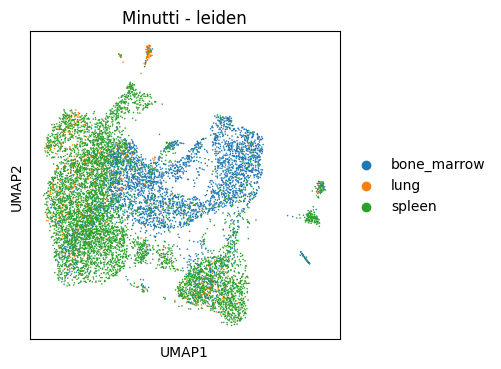

In [42]:
#plotting clusters 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_Minutti, color=["tissue"], ncols = 1, size=5, title="Minutti - leiden")

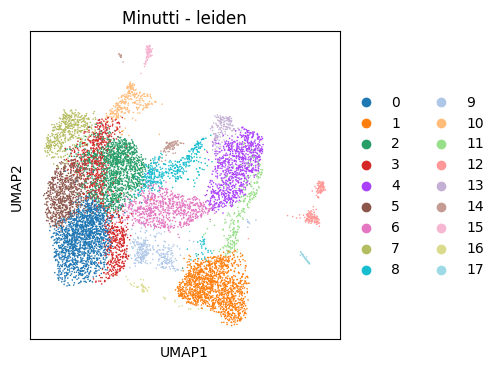

In [43]:
#plotting clusters 
with plt.rc_context({"figure.figsize": (4, 4)}):
    sc.pl.umap(data_Minutti, color=["leiden"], ncols = 1, size=5, title="Minutti - leiden")
# KT overlaid signatures from Minutti et al (see minutti_GSE217328.jpynb) and determined cluster 10 is cDC2A and cluster 2 is cDc2B

In [45]:
#calculate DEG genes:
sc.tl.rank_genes_groups(data_Minutti, groupby="leiden", key_added="NR_degs", method="wilcoxon") 

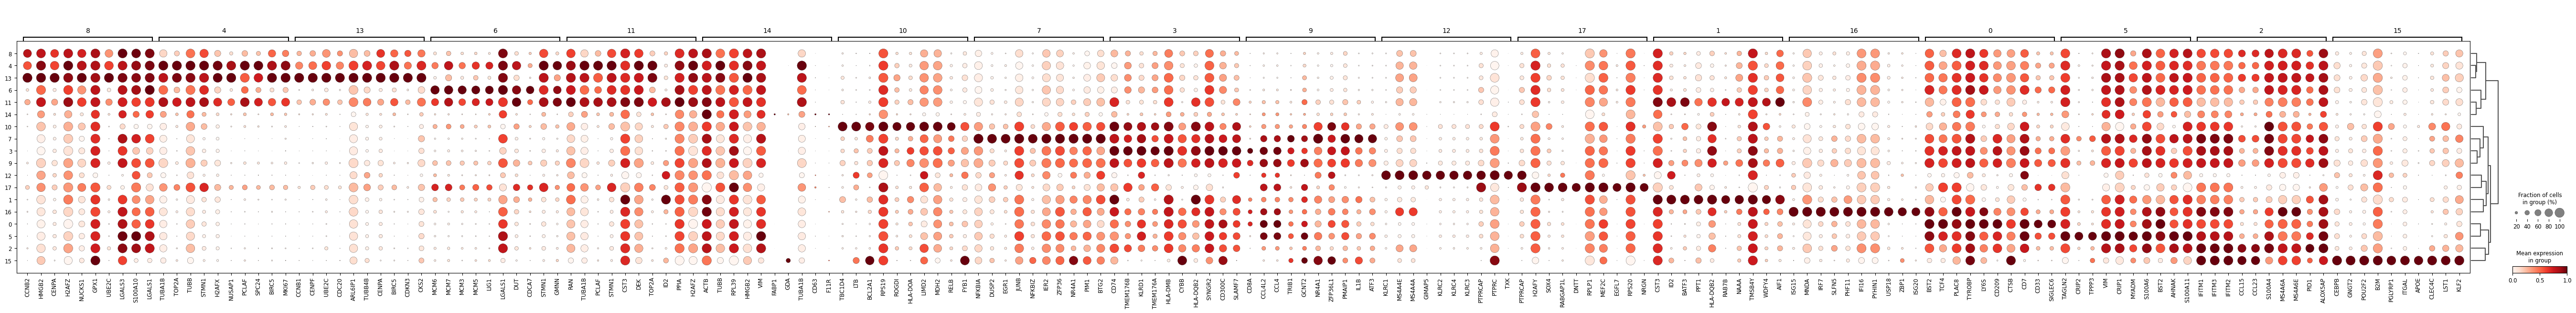

In [46]:
sc.pl.rank_genes_groups_dotplot(data_Minutti, groupby="leiden", key="NR_degs", standard_scale="var", n_genes=10)

In [47]:
# save DEGs for cDC2A (cluster 10) and cDC2B (cluster 2)

#cDC2A
Minutti_mouse_DC2A_Degs = sc.get.rank_genes_groups_df(data_Minutti, group="10", key="NR_degs")
#DC2B 
Minutti_mouse_DC2B_Degs = sc.get.rank_genes_groups_df(data_Minutti, group="2", key="NR_degs")

In [48]:
Minutti_mouse_DC2A_Degs.head()

,names,scores,logfoldchanges,pvals,pvals_adj
0,TBC1D4,26.238546,5.734086,9.658406e-152,9.423224e-148
1,LTB,25.935469,5.374140,2.652337e-148,1.725169e-144
2,BCL2A1,22.542812,5.194233,1.579589e-112,4.403216e-109
3,RPS19,22.008713,0.732568,2.376422e-107,4.637112e-104
4,ROGDI,21.166584,3.206660,1.941315e-99,2.525392e-96


In [49]:
Minutti_mouse_DC2B_Degs.head()

,names,scores,logfoldchanges,pvals,pvals_adj
0,IFITM1,36.629726,3.276567,9.623952e-294,6.259739e-290
1,IFITM3,36.629726,3.276567,9.623952e-294,6.259739e-290
2,IFITM2,36.629726,3.276567,9.623952e-294,6.259739e-290
3,CCL15,35.286076,2.734690,9.602991e-273,3.747663e-269
4,CCL23,35.286076,2.734690,9.602991e-273,3.747663e-269


In [50]:
# change any p values that are 0.0 to 1e-307 (lowest that excel can display)
min_float = 1e-307
Minutti_mouse_DC2A_Degs['pvals'] = Minutti_mouse_DC2A_Degs['pvals'].replace(0.0, min_float)
Minutti_mouse_DC2A_Degs['pvals_adj'] = Minutti_mouse_DC2A_Degs['pvals_adj'].replace(0.0, min_float)

Minutti_mouse_DC2B_Degs['pvals'] = Minutti_mouse_DC2B_Degs['pvals'].replace(0.0, min_float)
Minutti_mouse_DC2B_Degs['pvals_adj'] = Minutti_mouse_DC2B_Degs['pvals_adj'].replace(0.0, min_float)

In [51]:
#export degs to csv
Minutti_mouse_DC2A_Degs.to_csv("Minutti_Mouse_DEGs_cDC2A.csv", index=False)
Minutti_mouse_DC2B_Degs.to_csv("Minutti_Mouse_DEGs_cDC2B.csv", index=False)

# Overlay sigs on my atlas

In [20]:
data_DC2 = sc.read_h5ad('/scratch/user/s4436039/scdata/Myeloid_Objects/20250629_DC2_bbknn_clustered2.h5ad') 

In [52]:
# overlay Moon et al 2025 sigs
Brown_cDC2A = ['LTB','LST1','PLAC8','ABI3','CLEC4A','LYST','TNFRSF13C','FAM110A','CORO1A','ABHD6','VASP','AAAS','HIC1','GDI2','LITAF','RPS6KA4','LINC01531','FAM107B','FAM26F','HES4','MAP3K8','FYB','RAC2','BCL2A1','GABARAPL2','CTD-2006K23.1','NCF1','PTPRC','CA2','PTPN6','GSN','CFP','SH3D21','SNAP29','TMEM14C','HCK','CD300A','PAK1','RGS19','EVA1B','IFITM2','FXYD5','CD53','ITM2C','LSM10','FCMR','RUNX3','PLD4','OAZ2','CLN8','PMAIP1','SMIM14','CIB1','IL22RA2','TNFAIP2','FGR','TNNI2','ITGAX','LILRB1','CEACAM1','CD52','CPPED1','ACAA1','C11ORF31','SYNGR2','JAML','LRRC25','ADGRE5','ENTPD1','NR4A3','ARHGAP9','CD3E','AREG','SCLT1','INPP4A','RP11-596C23.2','ADA','SPATS2L','SEPT1','NCF2','RHOH','STK4','C12ORF10','UBE2E2','DEGS1','MARCKSL1','KLF4','CCDC50','STK40','GHRL','CASP4','DRAM2','SLC38A1','HSPA1B','TBC1D9','LY6E','IDO1','USF2','CD300LF','FAM65B'] 
Brown_cDC2B = ['CEBPD','CLEC10A','TYROBP','FCER1G','FTH1','RNF130','FTL','MNDA','CSTA','S100A6','SERPINA1','AIF1','ANXA1','S100A11','CARD16','CASP1','IL1R2','TIMP1','ZFP36L2','CEBPB','CD1C','IL1B','CTSS','S100A4','HCST','RNASE6','IFITM3','IGSF6','SMAP2','ITM2B','TNFSF13B','FCER1A','SH3BGRL3','JAML','CD33','TXNIP','CD1D','DOK2','ETS2','GIMAP4','CFP','TSPO','CD52','PILRA','FOS','ALDH2','FKBP1A','SERP1','RAC1','CTSH','RGS2','PDK4','SGK1','NPC2','ZFP36','TKT','EMP3','ETHE1','SNX10','HMGB2','GLUL','PID1','ZFAND5','NDUFA12','IL13RA1','LGALS3','ZEB2','MS4A6A','AP1S2','PHACTR1','IFITM2','GIMAP7','IFI30','CASP4','PRELID1','FAM26F','ANXA5','CACNA2D3','KLF2','SEC11A','CD1E','ARRB2','ATF3','C1QA','CAMK1','GLRX','FCGR2B','TNFAIP8L2','KCTD12','MS4A7','SUPT4H1','NDFIP1','HSD17B11','CXCR4','IL18','CSF1R','FIS1','TNFRSF1B','JUNB','FYB']
Minutti_cDC2A = ['TBC1D4','LTB','BCL2A1','RPS19','ROGDI','HLA-DOA','LIMD2','MDH2','RELB','FYB1','B2M','AVPI1','RUNX3','CD74','REL','PTPRC','LST1','HLA-DQB2','SERPINA3','RGS2','LCP1','CIITA','TSPAN13','CCND1','PRKCB','TRAF1','RASGEF1B','S100A4','ADAM23','ZFP36L1','C1orf162','KNOP1','HAUS8','STAP1','FOSB','LYST','DENND4A','FFAR2','TMEM176B','PGLYRP1','RGS12','SIRPB1','SIRPG','SIRPA','TMEM176A','GNGT2','MED30','FAM49A','KIT','ITGA4','PTGS2','MARCKSL1','CD83','HLA-DMB','HLA-DOB','ATOX1','PLXNC1','NAV1','GSN','PPP1R14A','PPDPF','NEDD4','CLEC4C','CYP4F8','RGS1','BASP1','FBRSL1','PRDX6','ELK3','TMEM131L','DDX5','AEBP2','MAN1A1','NR4A1','STK17B','CYB5R3','TCTEX1D2','KLRD1','IL2RG','UBE2E2','NFKB1','MTHFS','SOX4','CHD3','ASB2','MS4A4A','MS4A4E','CHKA','PLEK','DNMT3A','SIGLEC10','SIGLEC16','SIGLEC11','MALT1','MYCBP2','SLC38A2','TES','GABARAPL2','ELMO1','MARCKS'] 
Minutti_cDC2B = ['IFITM1','IFITM3','IFITM2','CCL15','CCL23','S100A4','MS4A6A','MS4A6E','PID1','ALOX5AP','NCF2','CD52','S100A10','SELENOP','AHNAK','LGALS3','S100A6','EMB','CCR2','PYHIN1','IFI16','GPR141','VIM','MS4A4A','MS4A4E','LIMD2','ITGB7','ANXA1','TXNIP','CLEC4C','SLFN12','SLFN12L','KCNE3','PYCARD','POU2F2','FCER1G','RASSF4','PLD4','CAMKK2','SMIM5','RSRP1','CX3CR1','LST1','LAMP1','SCPEP1','LAT2','SLFN5','HPGD','LMO4','ANXA2','TM6SF1','RARA','TSC22D3','TNFAIP8L2','ENO1','HCK','DOK3','CD209','CEBPD','EMILIN2','NUPR1','IL6R','FN1','IGSF6','TMEM176B','RBFA','LMO1','VSIR','LGALS1','MILR1','SAMD9L','ZEB2','MYCBP2','STXBP6','L1CAM','MACF1','BORCS6','CD300LG','ADD3','MCUB','RIN3','CLEC4A','GGH','ITGAM','DUSP22','MGST3','TNFAIP2','PTPRO','F13A1','RAPH1','MCEMP1','DDIT4','TCP11L2','FKBP1B','KLK8','PLEC','TRPS1','IL13RA1','SNX21','GSTO1']

In [53]:
# Define dictionary of gene sets
gene_sets = {
    "Brown_cDC2A_sig": Brown_cDC2A,
    "Brown_cDC2B_sig": Brown_cDC2B,
    "Minutti_cDC2A_sig": Minutti_cDC2A,
    "Minutti_cDC2B_sig": Minutti_cDC2B
}

In [54]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data_DC2, genes, score_name=name)

       'JAML', 'ADGRE5', 'RP11-596C23.2', 'SEPT1', 'C12ORF10', 'FAM65B'],
      dtype='object')
       'MCEMP1'],
      dtype='object')


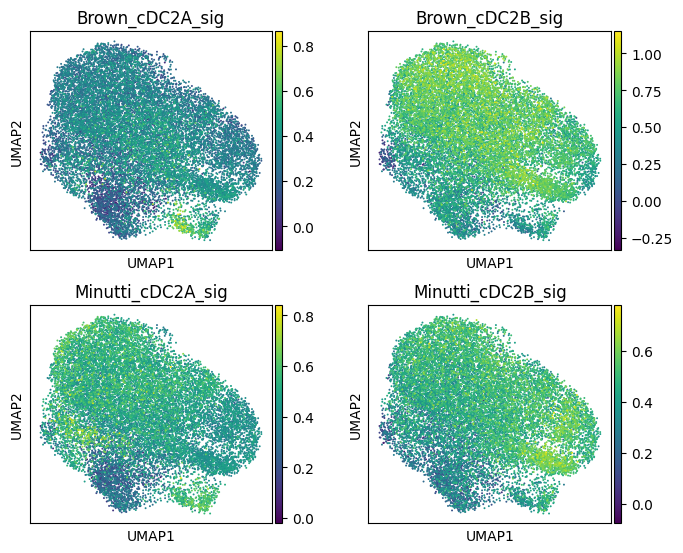

In [56]:
#plotting 
with plt.rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(data_DC2, color=gene_sets, ncols=2, size=8)
    #sc.pl.umap(data_DC2, color=gene_sets, ncols=3, size=8, save="_cDC2_Moon_Sigs.svg")

In [57]:
colour_vars = ["Brown_cDC2A_sig","Brown_cDC2B_sig","Minutti_cDC2A_sig","Minutti_cDC2B_sig"]

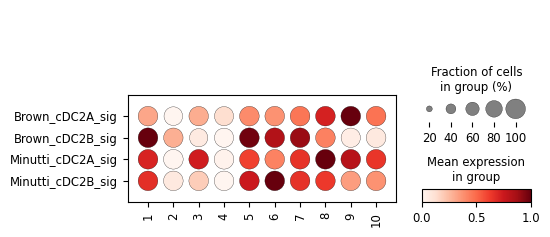

In [58]:
sc.pl.dotplot(data_DC2, colour_vars, groupby="cDC2_Atlas_Subclusters", standard_scale="var", swap_axes=True)

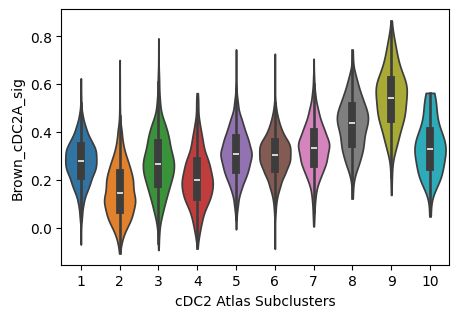

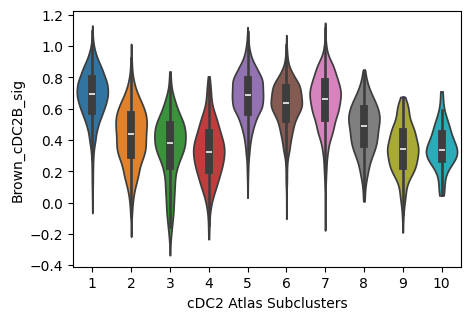

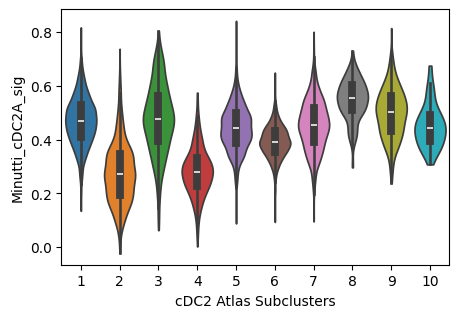

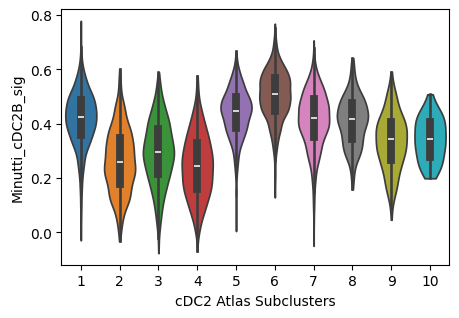

In [59]:
with plt.rc_context({"figure.figsize": (5, 3.5)}):
    for gene in gene_sets.keys():
        sc.pl.violin(
            data_DC2,
            keys=gene,
            groupby='cDC2_Atlas_Subclusters',
            stripplot=False,
            inner='box',
            show=True
            #save=f"_DC2_sigoverlay_Violin_{gene}.svg"
        )

In [63]:
# CD207+ / cDC2A sigs
DC_CD207_Moon = ['CD1A','CD207','FCGBP','LTB','SPI1','S100B'] 
DC2_CD207_Gui = ['CD207','CD1A'] 
DC2_CD1A_Cheng = ['CD207','CD1A','S100B','LTB'] 
cDC2A_Minutti_Short = ['CLEC4A','LTB','IL22RA2','CD3E']
cDC2B_Minutti_Short = ['CEBPD','IL1R2','FCER1A','FCN1','IL1B','CD1C','CEBPB','CLEC10A']

# overlay Moon et al 2025 sigs
Brown_cDC2A_Degs = ['LTB','LST1','PLAC8','ABI3','CLEC4A','LYST','TNFRSF13C','FAM110A','CORO1A','ABHD6','VASP','AAAS','HIC1','GDI2','LITAF','RPS6KA4','LINC01531','FAM107B','FAM26F','HES4','MAP3K8','FYB','RAC2','BCL2A1','GABARAPL2','CTD-2006K23.1','NCF1','PTPRC','CA2','PTPN6','GSN','CFP','SH3D21','SNAP29','TMEM14C','HCK','CD300A','PAK1','RGS19','EVA1B','IFITM2','FXYD5','CD53','ITM2C','LSM10','FCMR','RUNX3','PLD4','OAZ2','CLN8','PMAIP1','SMIM14','CIB1','IL22RA2','TNFAIP2','FGR','TNNI2','ITGAX','LILRB1','CEACAM1','CD52','CPPED1','ACAA1','C11ORF31','SYNGR2','JAML','LRRC25','ADGRE5','ENTPD1','NR4A3','ARHGAP9','CD3E','AREG','SCLT1','INPP4A','RP11-596C23.2','ADA','SPATS2L','SEPT1','NCF2','RHOH','STK4','C12ORF10','UBE2E2','DEGS1','MARCKSL1','KLF4','CCDC50','STK40','GHRL','CASP4','DRAM2','SLC38A1','HSPA1B','TBC1D9','LY6E','IDO1','USF2','CD300LF','FAM65B'] 
Brown_cDC2B_Degs = ['CEBPD','CLEC10A','TYROBP','FCER1G','FTH1','RNF130','FTL','MNDA','CSTA','S100A6','SERPINA1','AIF1','ANXA1','S100A11','CARD16','CASP1','IL1R2','TIMP1','ZFP36L2','CEBPB','CD1C','IL1B','CTSS','S100A4','HCST','RNASE6','IFITM3','IGSF6','SMAP2','ITM2B','TNFSF13B','FCER1A','SH3BGRL3','JAML','CD33','TXNIP','CD1D','DOK2','ETS2','GIMAP4','CFP','TSPO','CD52','PILRA','FOS','ALDH2','FKBP1A','SERP1','RAC1','CTSH','RGS2','PDK4','SGK1','NPC2','ZFP36','TKT','EMP3','ETHE1','SNX10','HMGB2','GLUL','PID1','ZFAND5','NDUFA12','IL13RA1','LGALS3','ZEB2','MS4A6A','AP1S2','PHACTR1','IFITM2','GIMAP7','IFI30','CASP4','PRELID1','FAM26F','ANXA5','CACNA2D3','KLF2','SEC11A','CD1E','ARRB2','ATF3','C1QA','CAMK1','GLRX','FCGR2B','TNFAIP8L2','KCTD12','MS4A7','SUPT4H1','NDFIP1','HSD17B11','CXCR4','IL18','CSF1R','FIS1','TNFRSF1B','JUNB','FYB']
Minutti_cDC2A_Degs = ['TBC1D4','LTB','BCL2A1','RPS19','ROGDI','HLA-DOA','LIMD2','MDH2','RELB','FYB1','B2M','AVPI1','RUNX3','CD74','REL','PTPRC','LST1','HLA-DQB2','SERPINA3','RGS2','LCP1','CIITA','TSPAN13','CCND1','PRKCB','TRAF1','RASGEF1B','S100A4','ADAM23','ZFP36L1','C1orf162','KNOP1','HAUS8','STAP1','FOSB','LYST','DENND4A','FFAR2','TMEM176B','PGLYRP1','RGS12','SIRPB1','SIRPG','SIRPA','TMEM176A','GNGT2','MED30','FAM49A','KIT','ITGA4','PTGS2','MARCKSL1','CD83','HLA-DMB','HLA-DOB','ATOX1','PLXNC1','NAV1','GSN','PPP1R14A','PPDPF','NEDD4','CLEC4C','CYP4F8','RGS1','BASP1','FBRSL1','PRDX6','ELK3','TMEM131L','DDX5','AEBP2','MAN1A1','NR4A1','STK17B','CYB5R3','TCTEX1D2','KLRD1','IL2RG','UBE2E2','NFKB1','MTHFS','SOX4','CHD3','ASB2','MS4A4A','MS4A4E','CHKA','PLEK','DNMT3A','SIGLEC10','SIGLEC16','SIGLEC11','MALT1','MYCBP2','SLC38A2','TES','GABARAPL2','ELMO1','MARCKS'] 
Minutti_cDC2B_Degs = ['IFITM1','IFITM3','IFITM2','CCL15','CCL23','S100A4','MS4A6A','MS4A6E','PID1','ALOX5AP','NCF2','CD52','S100A10','SELENOP','AHNAK','LGALS3','S100A6','EMB','CCR2','PYHIN1','IFI16','GPR141','VIM','MS4A4A','MS4A4E','LIMD2','ITGB7','ANXA1','TXNIP','CLEC4C','SLFN12','SLFN12L','KCNE3','PYCARD','POU2F2','FCER1G','RASSF4','PLD4','CAMKK2','SMIM5','RSRP1','CX3CR1','LST1','LAMP1','SCPEP1','LAT2','SLFN5','HPGD','LMO4','ANXA2','TM6SF1','RARA','TSC22D3','TNFAIP8L2','ENO1','HCK','DOK3','CD209','CEBPD','EMILIN2','NUPR1','IL6R','FN1','IGSF6','TMEM176B','RBFA','LMO1','VSIR','LGALS1','MILR1','SAMD9L','ZEB2','MYCBP2','STXBP6','L1CAM','MACF1','BORCS6','CD300LG','ADD3','MCUB','RIN3','CLEC4A','GGH','ITGAM','DUSP22','MGST3','TNFAIP2','PTPRO','F13A1','RAPH1','MCEMP1','DDIT4','TCP11L2','FKBP1B','KLK8','PLEC','TRPS1','IL13RA1','SNX21','GSTO1']

In [68]:
# Define dictionary of gene sets
gene_sets = {
    "DC_CD207_Moon": DC_CD207_Moon,
    "DC2_CD207_Gui": DC2_CD207_Gui,
    "DC2_CD1A_Cheng": DC2_CD1A_Cheng,
    "cDC2A_Minutti_Short": cDC2A_Minutti_Short,
    "cDC2B_Minutti_Short": cDC2B_Minutti_Short,
    "Brown_cDC2A_Degs": Brown_cDC2A_Degs,
    "Minutti_Mouse_cDC2A_Degs": Minutti_cDC2A_Degs,
    "Brown_cDC2B_Degs": Brown_cDC2B_Degs,
    "Minutti_Mouse_cDC2B_Degs": Minutti_cDC2B_Degs
}

In [71]:
# Loop through each gene set and calculate the scores
for name, genes in gene_sets.items():
    sc.tl.score_genes(data_DC2, genes, score_name=name)

       'JAML', 'ADGRE5', 'RP11-596C23.2', 'SEPT1', 'C12ORF10', 'FAM65B'],
      dtype='object')
       'MCEMP1'],
      dtype='object')


In [72]:
colour_vars = ["DC_CD207_Moon","DC2_CD207_Gui","DC2_CD1A_Cheng","cDC2A_Minutti_Short","cDC2B_Minutti_Short","Brown_cDC2A_Degs","Minutti_Mouse_cDC2A_Degs","Brown_cDC2B_Degs","Minutti_Mouse_cDC2B_Degs"]

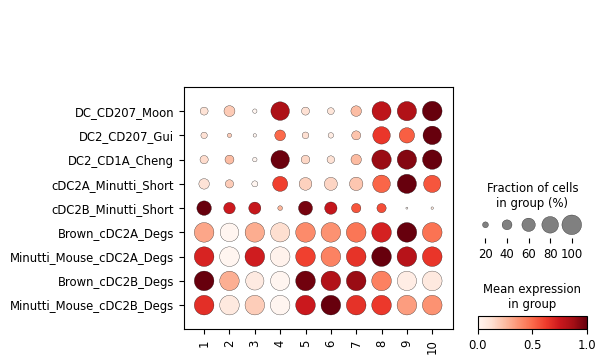

In [73]:
sc.pl.dotplot(data_DC2, colour_vars, groupby="cDC2_Atlas_Subclusters", standard_scale="var", swap_axes=True)

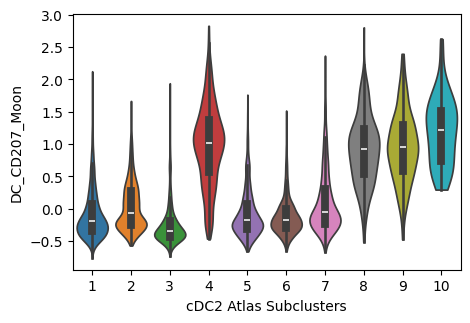

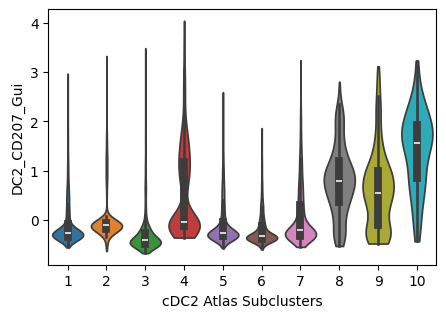

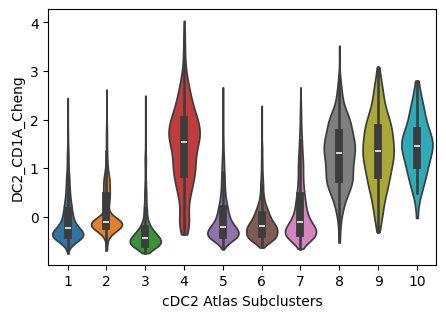

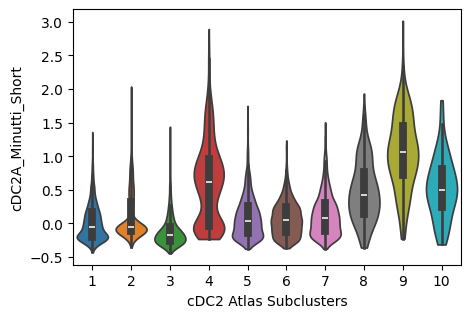

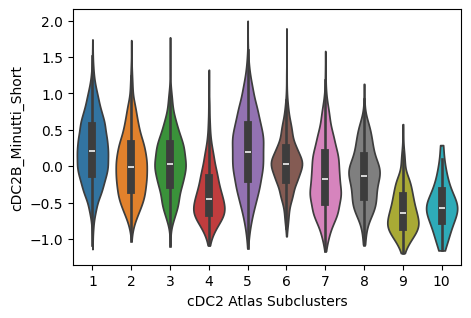

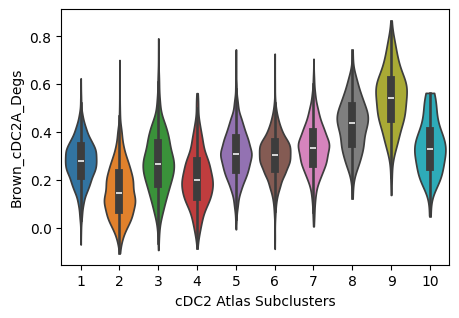

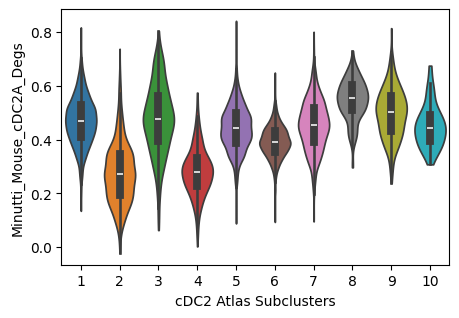

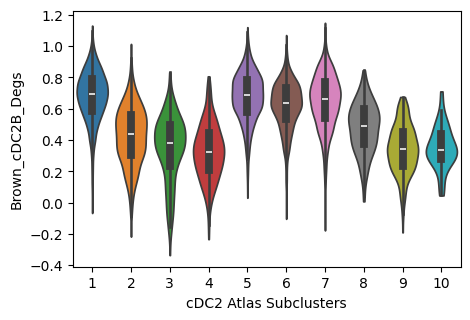

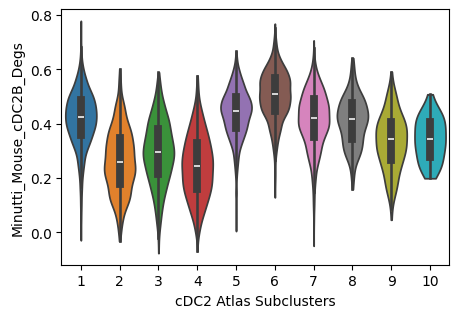

In [74]:
with plt.rc_context({"figure.figsize": (5, 3.5)}):
    for gene in gene_sets.keys():
        sc.pl.violin(
            data_DC2,
            keys=gene,
            groupby='cDC2_Atlas_Subclusters',
            stripplot=False,
            inner='box',
            show=True
            #save=f"_DC2_sigoverlay_Violin_{gene}.svg"
        )